In [79]:
import PyPDF2
import warnings
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
warnings.filterwarnings("ignore",category=DeprecationWarning)
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cni4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
filename1 = 'Docs/Numerical_and_Experimental_Investigation_of_Flow.pdf'
filename2 = 'Docs/Paper_SAE_NARDARI_2018-01-1287.pdf'
filename3 = 'Docs/AERO2022_104_C. NARDARI_P.pdf'

open_filename1 = open(filename1, 'rb')
open_filename2 = open(filename2, 'rb')
open_filename3 = open(filename3, 'rb')

doc1 = PyPDF2.PdfFileReader(open_filename1)
doc2 = PyPDF2.PdfFileReader(open_filename2)
doc3 = PyPDF2.PdfFileReader(open_filename3)

In [65]:
doc1.getDocumentInfo()

{'/Keywords': '',
 '/Creator': 'LaTeX with hyperref',
 '/ModDate': "D:20190610101741-07'00'",
 '/Trapped': '/False',
 '/CreationDate': "D:20190429190222-04'00'",
 '/Subject': '',
 '/Producer': 'pdfTeX-1.40.19; modified using iText 4.2.0 by 1T3XT',
 '/PTEX.Fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) kpathsea version 6.3.0',
 '/Author': '',
 '/Title': ''}

In [66]:
doc2.getDocumentInfo()

{'/Appligent': 'StampPDF Batch 5.2.2 Linux Kernel 2.6 64bit Dec 20 2012 Library 10.1.0',
 '/CreationDate': "D:20180327132731+05'30'",
 '/Creator': 'Appligent StampPDF Batch 5.2.2',
 '/ModDate': "D:20180419105125-04'00'",
 '/Producer': 'Adobe PDF Library 15.0',
 '/Trapped': '/False'}

In [67]:
doc3.getDocumentInfo()

{'/Title': 'Au nom du Comité de Programme du 39ème Colloque d’Aérodynamique Appliquée de l’AAAF, je suis heureux de vous faire savoir que votre communication a été acceptée pour faire l’objet d’un exposé en séance',
 '/Author': 'Clement.NARDARI@3ds.com',
 '/Creator': 'Microsoft® Word 2019',
 '/CreationDate': "D:20220221082931+01'00'",
 '/ModDate': "D:20220221082931+01'00'",
 '/Producer': 'Microsoft® Word 2019'}

In [68]:
pages1=doc1.numPages
pages2=doc2.numPages
pages3=doc3.numPages
print(pages1,pages2,pages3)

17 8 12


In [69]:
import textract   

In [94]:
count = 0
text  = ''

# Lets loop through, to read each page from the pdf file
while(count < pages1):
    # Get the specified number of pages in the document
    print(count)
    doc1_page  = doc1.getPage(count)
    # Process the next page
    count += 1
    # Extract the text from the page
    text += doc1_page.extractText()
    print(text)

0
Numerical and Experimental Investigation of Flow
Conﬁnement Eﬀects on UAV Rotor Noise
Clément Nardari∗, Damiano Casalino†and Francesco Polidoro‡
Dassault Systèmes Simulia Corp., 175 Wyman St., Waltham, MA, 02451
Vedran Coralic§, John Brodie¶and Phoi-Tack Lew‖
Amazon.com Inc., 410 Terry Ave. N, Seattle, WA, 98109
The primary objective of the present study is to investigate the impact of the recirculating
ﬂow that develops inside a closed, hemi-anechoic test chamber on the noise generation mecha-
nismsofadronerotoroperatedunderstaticthrustconditions. Tothatend,Lattice-Boltzmann
simulations are conducted for both an idealized, semi-inﬁnite free-ﬁeld and a conﬁned, hemi-
anechoic domain that models the test chamber, with the latter validated against experimental
measurements. Comparison between simulations reveals a signiﬁcant increase in rotor noise
due to conﬁnement, up to 5 dBA in overall sound pressure level depending on microphone
location, with negligible impact on aerodynamic perf

In [71]:
if text != '':
    text = text
    
else:
    textract.process(open_filename, method='tesseract', encoding='utf-8', langauge='eng' )  

In [95]:
from collections import Counter
punctuation= '''!()-[]{};:'"\,<>./?@#$%^&*_~1234567890'''
translationTable= str.maketrans("","",punctuation)
clean = text.translate(translationTable)
clean = ' '.join( [word.lower() for word in clean.split() if len(word)>1] )

words = []

words.extend(clean.split())

counts = Counter(words)
counts

Counter({'numerical': 6,
         'and': 143,
         'experimental': 7,
         'investigation': 3,
         'of': 176,
         'flow': 1,
         'conﬁnement': 7,
         'eﬀects': 13,
         'on': 52,
         'uav': 1,
         'rotor': 45,
         'noise': 43,
         'clément': 1,
         'nardari∗': 1,
         'damiano': 1,
         'casalino†and': 1,
         'francesco': 1,
         'polidoro‡': 1,
         'dassault': 2,
         'systèmes': 1,
         'simulia': 7,
         'corp': 2,
         'wyman': 1,
         'st': 1,
         'waltham': 1,
         'ma': 1,
         'vedran': 1,
         'coralic§': 1,
         'john': 1,
         'brodie¶and': 1,
         'phoitack': 1,
         'lew‖': 1,
         'amazoncom': 2,
         'inc': 3,
         'terry': 1,
         'ave': 1,
         'seattle': 1,
         'wa': 1,
         'the': 415,
         'primary': 1,
         'objective': 1,
         'present': 3,
         'study': 6,
         'is': 80,
         'to':

In [96]:
clean

'numerical and experimental investigation of flow conﬁnement eﬀects on uav rotor noise clément nardari∗ damiano casalino†and francesco polidoro‡ dassault systèmes simulia corp wyman st waltham ma vedran coralic§ john brodie¶and phoitack lew‖ amazoncom inc terry ave seattle wa the primary objective of the present study is to investigate the impact of the recirculating ﬂow that develops inside closed hemianechoic test chamber on the noise generation mecha nismsofadronerotoroperatedunderstaticthrustconditions tothatendlatticeboltzmann simulations are conducted for both an idealized semiinﬁnite freeﬁeld and conﬁned hemi anechoic domain that models the test chamber with the latter validated against experimental measurements comparison between simulations reveals signiﬁcant increase in rotor noise due to conﬁnement up to dba in overall sound pressure level depending on microphone location with negligible impact on aerodynamic performance bladestrip and beamforming source identiﬁcation techni

In [97]:
stop_words = set(stopwords.words('english'))
filtered_words={w:f for w,f in counts.items() if w not in stop_words}

In [98]:
filtered_words

{'numerical': 6,
 'experimental': 7,
 'investigation': 3,
 'flow': 1,
 'conﬁnement': 7,
 'eﬀects': 13,
 'uav': 1,
 'rotor': 45,
 'noise': 43,
 'clément': 1,
 'nardari∗': 1,
 'damiano': 1,
 'casalino†and': 1,
 'francesco': 1,
 'polidoro‡': 1,
 'dassault': 2,
 'systèmes': 1,
 'simulia': 7,
 'corp': 2,
 'wyman': 1,
 'st': 1,
 'waltham': 1,
 'vedran': 1,
 'coralic§': 1,
 'john': 1,
 'brodie¶and': 1,
 'phoitack': 1,
 'lew‖': 1,
 'amazoncom': 2,
 'inc': 3,
 'terry': 1,
 'ave': 1,
 'seattle': 1,
 'wa': 1,
 'primary': 1,
 'objective': 1,
 'present': 3,
 'study': 6,
 'investigate': 1,
 'impact': 3,
 'recirculating': 5,
 'ﬂow': 29,
 'develops': 1,
 'inside': 2,
 'closed': 4,
 'hemianechoic': 12,
 'test': 6,
 'chamber': 19,
 'generation': 6,
 'mecha': 1,
 'nismsofadronerotoroperatedunderstaticthrustconditions': 1,
 'tothatendlatticeboltzmann': 1,
 'simulations': 24,
 'conducted': 2,
 'idealized': 2,
 'semiinﬁnite': 1,
 'freeﬁeld': 3,
 'conﬁned': 30,
 'hemi': 1,
 'anechoic': 6,
 'domain': 2,
 'mod

In [99]:
df2 = pd.DataFrame.from_dict(filtered_words, orient='index')
df2.columns = ['value']
df2.index.name = 'name'
df2.reset_index(inplace=True)

In [100]:
from notebookjs import execute_js
d3 = "https://d3js.org/d3.v3.min.js"

with open("visualization/template/style.css", "r") as f:
    style = f.read()
    
with open ("./visualization/template/script.js", "r") as f:
    script = f.read()

In [101]:
execute_js(library_list=[d3, script], main_function="radial_bar", data_dict=df2.sort_values(ascending=False, by=["value"])[:15].to_dict(orient="records"), css_list=[style])

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell

In [ ]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    # Initialize the stopwords variable, which is a list of words ('and', 'the', 'i', 'yourself', 'is') that do not hold much values as key words
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
    
    # Removing prefixed 'b'
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    
    
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [ ]:
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]

# lets print out the output from our function above and see how the data looks like
clean_data = ' '.join(lemmatized_word)
print(clean_data)

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string

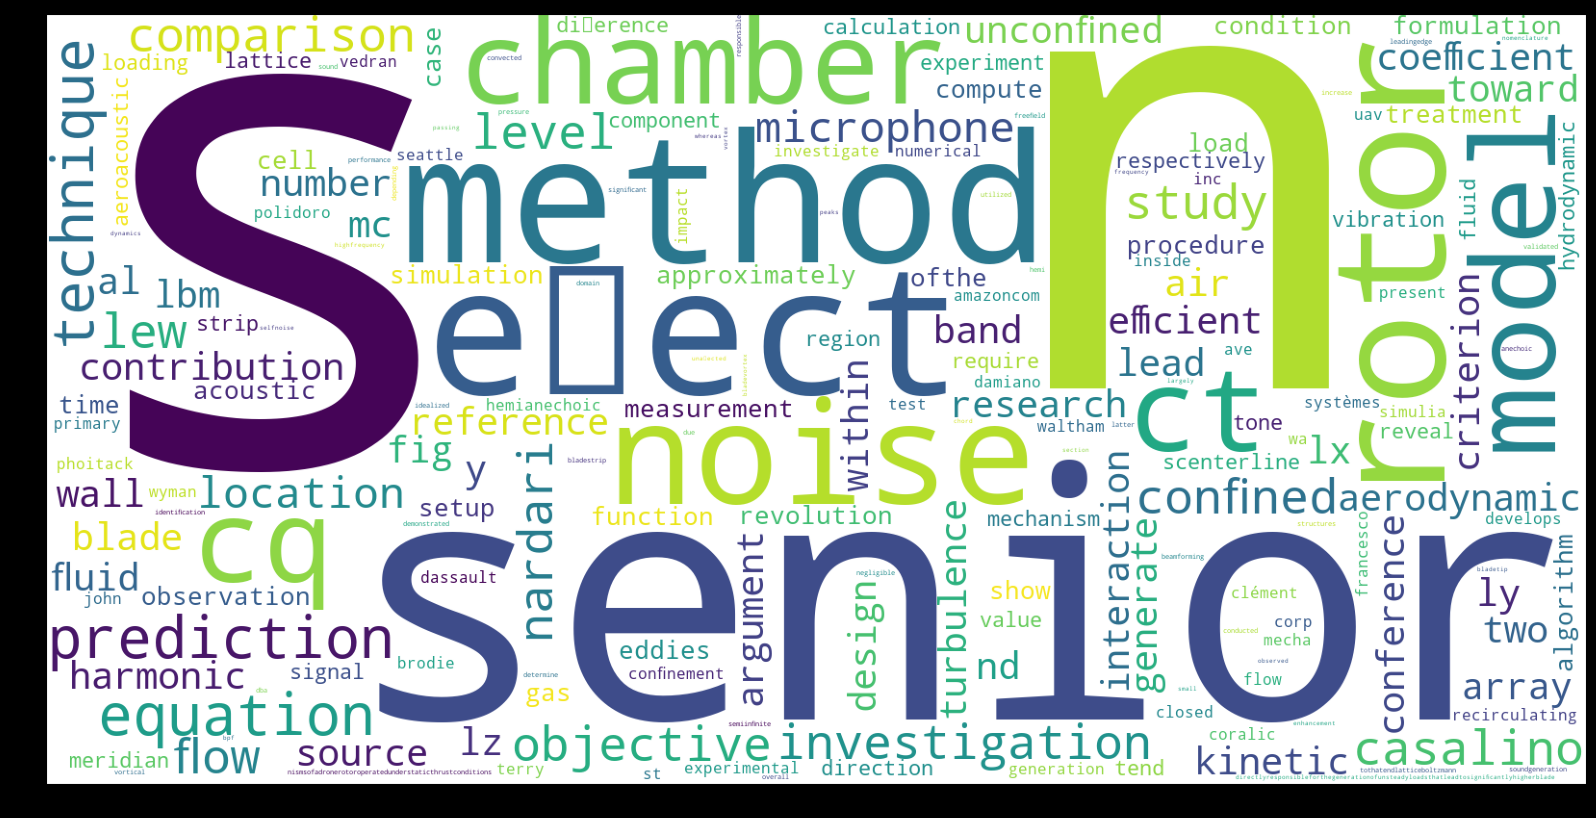

In [103]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df2['name'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)